教師が作った模範解答としての Excelファイルと、各学生が解答として提出したExcelファイルとを、セルを一つ一つ比較して、差がどれくらいあるかをチェックするスクリプトです。

This is a script that compares the Excel file as a model answer created by the teacher and the Excel file submitted as an answer by each student, cell by cell, and checks how much difference there is.

In [3]:
# https://it-ojisan.tokyo/colab-sys-modules/
# After running the following code, Google Drive will be mounted and available
# if you are running in Google Colab.
# When the dialog "Do you want to allow this notebook to access files on Google Drive?"
# appears, click "Connect to Google Drive" to allow it.
import sys
moduleList = sys.modules
ENV_COLAB = False
if 'google.colab' in moduleList:
    ENV_COLAB = True
    # print("google_colab")
if ENV_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')
  gdpath = "/content/drive/MyDrive/"
else:
  gdpath = ""

# make folders
import os
ansfile_folder = gdpath + "ediff-ans-files"
stfile_folder  = gdpath + "ediff-st-files"
out_folder     = gdpath + "ediff-out-files"
os.makedirs(ansfile_folder, exist_ok=True)
os.makedirs(stfile_folder, exist_ok=True)
os.makedirs(out_folder, exist_ok=True)

# https://tech-blog.rakus.co.jp/entry/20210729/openpyxl
# https://atmarkit.itmedia.co.jp/ait/articles/2202/08/news031.html
import glob
import openpyxl
from openpyxl.comments import Comment
from openpyxl.styles import PatternFill, Border, Side, Alignment, Protection, Font

ansfiles = glob.glob(ansfile_folder + "/**/*.xlsx", recursive=True)
for file0 in sorted(ansfiles):
  ansfilename = file0
print("answer file : " + ansfilename)
wb_ans      = openpyxl.load_workbook(ansfilename, data_only=True)
#wb_ans      = openpyxl.load_workbook(ansfile_folder + "/joho_2_02_2_kaitou.xlsx", data_only=True)

fileno = 0
stfiles = glob.glob(stfile_folder + "/**/*.xlsx", recursive=True)
for stfile in sorted(stfiles):
  fileno += 1
  #if(fileno < 34):
    #continue
  print("now: " + stfile)
  wb_dataonly = openpyxl.load_workbook(stfile, data_only=True) # 数式ではなく計算結果
  wb_dataonly.close()
  wb          = openpyxl.load_workbook(stfile)

  # 巨大なファイルを読み込むときのオプション：
  # https://openpyxl.readthedocs.io/en/stable/optimized.html?highlight=load_workbook#read-only-mode

  rownum_sum = 0
  for sheet in wb:
    rownum_sum += sheet.max_row
  print(f' rownum_sum:{rownum_sum}')
  if (rownum_sum > 10000000):
    nosave = True
  else:
    nosave = False
    
  diff_num = 0
  add_num = 0
  # すべてのシートについて
  for wsheet in wb:
    if (wsheet.title != 'enshuu' and wsheet.title != 'ouyou') :
      continue
    wsheet_ans      = wb_ans[wsheet.title]
    wsheet_dataonly = wb_dataonly[wsheet.title]
    #print(f'******* sheet name: {wsheet.title}') #####

    # ワークシートの全セルを反復（行ごと）
    irow = 0
    for row in wsheet.iter_rows():
      irow += 1
      if (irow > 100):
        continue
      icol = 0
      for cell in row:
        icol += 1
        if (icol > 100):
          continue
        value_ans = wsheet_ans.cell(cell.row, cell.column).value
        value_dataonly = wsheet_dataonly.cell(cell.row, cell.column).value
        if (str(value_dataonly) != str(value_ans)):
        #if (str(cell.value) != str(value_ans)):
          cell.comment = Comment(str(value_ans), "excel-diff") # comment, author
          # print("[" + str(cell.row) + "," + str(cell.column) + "] " + str(value_dataonly) + "<" + str(cell.value) + ">  ans:" + str(value_ans))
          if(str(value_ans) == "None"):
            add_num += 1
          else:
            diff_num += 1
  '''
  # ワークシートの全セルを反復（列ごと）
for column in ws.iter_cols(values_only=True):
    print(column)

for column in ws.columns:
    for cell in column:
        print(cell.value)
  '''
  print(stfile + "  diff num = " + str(diff_num) + "  add_num = " + str(add_num))
  outfile = stfile
  outfile = outfile.replace(stfile_folder, "").replace("/","_")
  if(nosave):
    print(" " + stfile + " is too big to save.")
  else:
    wb.save(out_folder + "/{:06}".format(diff_num) + "_" + "{:06}".format(add_num) + "_" + outfile)
  wb.close()



answer file : ediff-ans-files/joho_2_02_2_kaitou.xlsx
now: ediff-st-files/joho_2_02_2_gakusei_sample01.xlsx
 rownum_sum:51848
ediff-st-files/joho_2_02_2_gakusei_sample01.xlsx  diff num = 0  add_num = 139
now: ediff-st-files/joho_2_02_2_gakusei_sample04.xlsx
 rownum_sum:55609
ediff-st-files/joho_2_02_2_gakusei_sample04.xlsx  diff num = 658  add_num = 0
now: ediff-st-files/joho_2_02_2_gakusei_sample05.xlsx
 rownum_sum:55705
ediff-st-files/joho_2_02_2_gakusei_sample05.xlsx  diff num = 0  add_num = 0
now: ediff-st-files/joho_2_02_2_gakusei_sample06.xlsx
 rownum_sum:51848
ediff-st-files/joho_2_02_2_gakusei_sample06.xlsx  diff num = 470  add_num = 0
now: ediff-st-files/joho_2_02_2_gakusei_sample07.xlsx
 rownum_sum:54537
ediff-st-files/joho_2_02_2_gakusei_sample07.xlsx  diff num = 0  add_num = 0
now: ediff-st-files/joho_2_02_2_gakusei_sample08.xlsx
 rownum_sum:53760
ediff-st-files/joho_2_02_2_gakusei_sample08.xlsx  diff num = 611  add_num = 0
now: ediff-st-files/joho_2_02_2_gakusei_sample09.x

In [ ]:
#Identifier,Grade,"Last modified (grade)","Feedback comments"
#"Participant 5219407",81,,"ind1:0 ind2:123 ind3:20"
#"Participant 5219552",82,,"ind1:20 ind2:103 ind3:30"

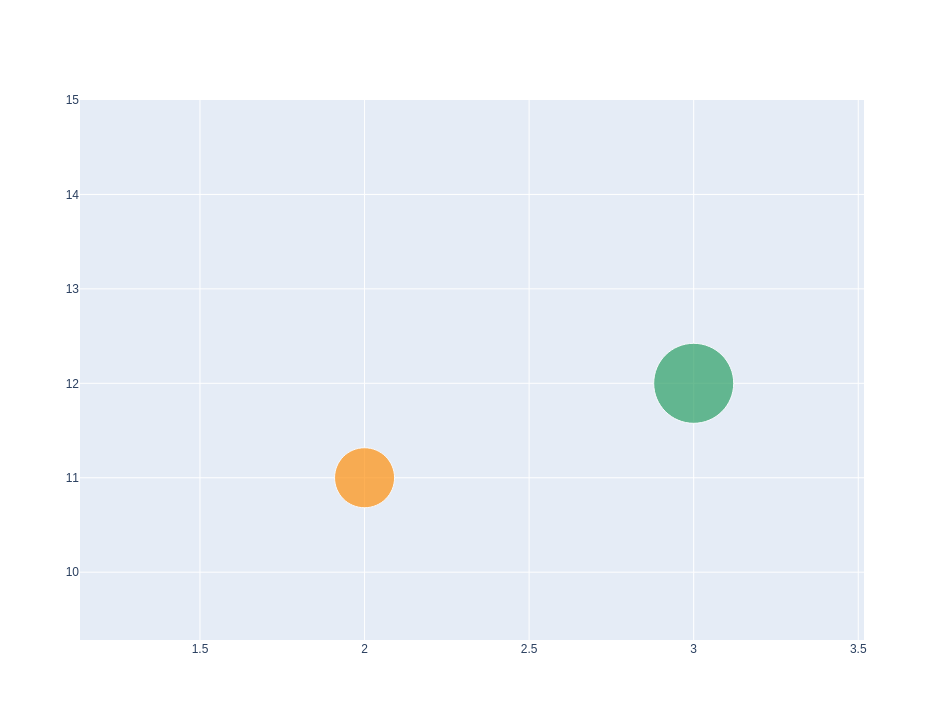

In [7]:
# https://plotly.com/python/
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4], y=[10, 11, 12, 13],
    text=['A<br>size: 40', 'B<br>size: 60', 'C<br>size: 80', 'D<br>size: 100'],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        size=[40, 60, 80, 100],
    )
)])

fig.show()
